In [136]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special

In [193]:
 def show_shape(patch):
    ax=plt.gca()
    ax.add_patch(patch)
    plt.axis()


## Slope Field

In [25]:
sizeSl = 2
stepSl = 1
radiusSl = stepSl / 4

In [76]:
def slopeField(foo, fooSet=None, additionalF=None, circles=None):
    plt.axvline(x=0)
    plt.axhline(y=0)
    for t in np.arange(- sizeSl, sizeSl + radiusSl, stepSl):
        for x in np.arange(- sizeSl, sizeSl + radiusSl, stepSl):
            curGrad = foo(t, x)
            if curGrad != None:
                if abs(curGrad) < 1:
                    plt.plot([t - radiusSl, t + radiusSl], [x - radiusSl  * curGrad, x + radiusSl * curGrad],  color = 'orange')
                else:
                    plt.plot([t - radiusSl * 1 / curGrad, t + radiusSl * 1 / curGrad], [x - radiusSl, x + radiusSl],  color = 'orange')
    if fooSet != None:
        for foo1 in fooSet:
            newRange = np.arange(- sizeSl, sizeSl + radiusSl, 0.01)
            plt.plot(newRange, foo1(newRange))
    if additionalF != None:
        intersect = np.arange(-sizeSl, sizeSl, 0.001)
        plt.plot(intersect, additionalF(intersect), color="navy")
    if circles != None:
        for i in circles:
            for j in circles:
                c = plt.Circle((i, j), radius= 0.1)
                show_shape(c)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

## Integral Curve

In [106]:
sizeInt = 4
stepInt = 0.003
radiusInt = stepInt / 3

In [107]:
def integralCurve(foo, t1, t2, requiredRange, stepInt):
    colors = ["maroon", "darkcyan", "forestgreen", "crimson", "orchid"]
    axes = plt.gca()
    axes.set_ylim([-10, 10])
    step = -1
    for startPoint in requiredRange:
        step += 1
        x = startPoint
        for t in np.arange(t1, t2, stepInt):
            curGrad = foo(t, x)
            plt.plot([t, t + stepInt], [x, x + stepInt * curGrad],  color = colors[step])
            if abs(curGrad) > 1000.0:
                break
            x = x + stepInt * curGrad
    
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.show()

## Vector Field

In [111]:
sizeVec = 3
stepVec = 0.2

In [114]:
def vectorField(foo, markVertHor=None):
    axes = plt.gca()
    axes.set_xlim([-2.5, 2.5]) 
    axes.set_ylim([-3, 3])
    for x in np.arange(-sizeVec, sizeVec, stepVec):
        for y in np.arange(-sizeVec, sizeVec, stepSl):
            curVec = foo(x, y)
            if markVertHor and (curVec[0] == 0 or curVec[1] == 0):
                axes.arrow(x, y, x + curVec[0], y + curVec[1], head_width=0.15, head_length=0.3, fc='b', ec='y')
            else:
                axes.arrow(x, y, x + curVec[0], y + curVec[1], head_width=0.15, head_length=0.3, fc='r', ec='k')
            #plt.plot([x, x + curVec[0]], [y, y + curVec[1]], color = 'darkgreen')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.show()

## Phase Path

In [62]:
sizePhase = 4
stepPhase = 0.4

In [63]:
def phasePath(foo):
    axes = plt.gca()
    axes.set_xlim([-0.1, 4]) 
    axes.set_ylim([-7, 7])
    interval = np.arange(0, sizePhase, 0.01)

    for constant in np.arange(-20 * stepPhase, 20 * stepPhase, stepPhase):
        plt.plot(interval, foo(interval) * constant, color = 'orange')

    plt.axvline(x=0)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.show()

## Function

In [130]:
def graph2(foo1, foo2):
    axes = plt.gca()
    axes.set_ylim([-7, 7])
    interval = np.arange(-5, 5, 0.01)
    plt.plot(interval, foo1(interval), color = 'orange', label='H(x, y_0)')
    plt.plot(interval, foo2(interval), color = 'lightgreen', label='H(x_0, y)')
    
    plt.legend()
    plt.show()

### Task 1

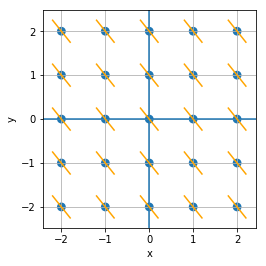

In [87]:
def foo(x, y):
    k = -5/4
    return k
slopeField(foo, circles=range(-2, 3))

/home/pavlk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


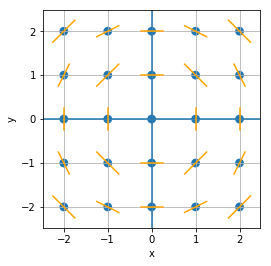

In [93]:
def foo(x, y):
    if y == 0 and x == 0:
        return None
    k = -x/y
    return k
slopeField(foo, circles=range(-2, 3))

/home/pavlk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


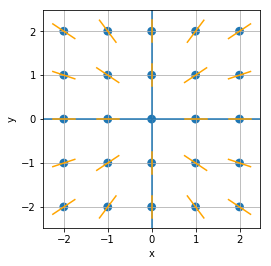

In [92]:
def foo(x, y):
    if x == 0 and y == 0:
        return None
    k = 2 * y / x / 3
    return k
slopeField(foo, circles=range(-2, 3))

/home/pavlk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


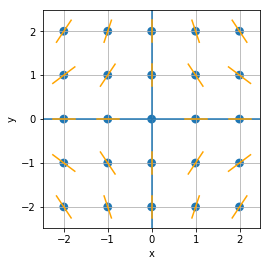

In [94]:
def foo(x, y):
    if x == 0 and y == 0:
        return None
    k = -3 * y / x / 2
    return k
slopeField(foo, circles=range(-2, 3))

### Task 2

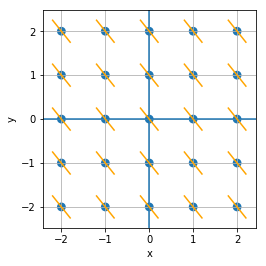

In [83]:
def foo(x, y):
    k = -5/4
    return k
slopeField(foo, circles=range(-2, 3))

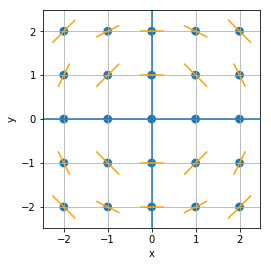

In [84]:
def foo(x, y):
    if y == 0:
        return None
    k = -x/y
    return k
slopeField(foo, circles=range(-2, 3))

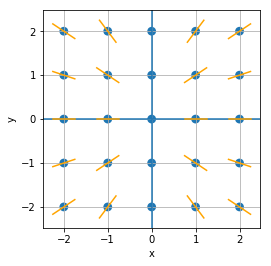

In [85]:
def foo(x, y):
    if x == 0:
        return None
    k = 2 * y / x / 3
    return k
slopeField(foo, circles=range(-2, 3))

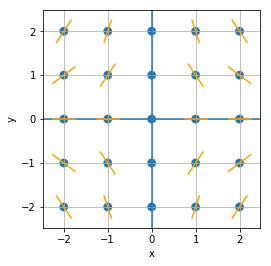

In [86]:
def foo(x, y):
    if x == 0:
        return None
    k = -3 * y / x / 2
    return k
slopeField(foo, circles=range(-2, 3))

### Task 3

##### b

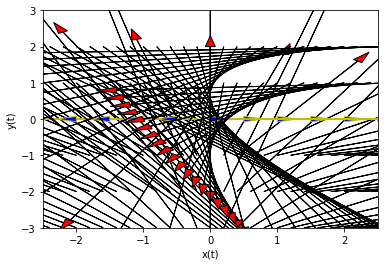

In [115]:
def foo(x, y): 
    return 0.5 * x - 3 * x * y, -4 * y + 1 * x * y
vectorField(foo, markVertHor=True)

##### h

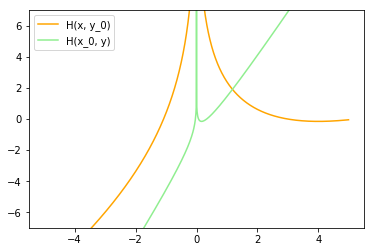

In [131]:
def F(x):
    return x - 4 * np.log(abs(x))
def G(y):
    return 3 * y - 0.5 * np.log(abs(y))
def foo1(x):
    return F(x) + G(0.1666666666666666666)
def foo2(y):
    return F(4) + G(y)
graph2(foo1, foo2)

##### i

In [209]:
sizePhase = 10
stepPhase = 5
def phasePathLambert(foo):
    axes = plt.gca()
    axes.set_xlim([-4, 4]) 
    axes.set_ylim([-1, 12])
    interval = np.arange(-sizePhase, sizePhase, 0.01)

    for constant in np.arange(-10 * stepPhase, 10 * stepPhase, stepPhase):
        plt.plot(interval, 1/6 * special.lambertw(-6 * np.exp(2 * interval + constant) / interval ** 8), color = 'orange')

    #plt.axvline(x=0)
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    c=plt.Circle((1/6, 4), radius= 0.2)
    show_shape(c)

    plt.show()

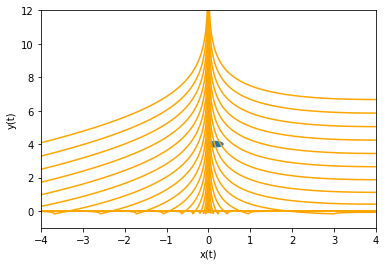

In [210]:
def foo(x): # first equation
    return x**(3/4)
phasePathLambert(foo)

### something like a circle/egg is only one permament solution

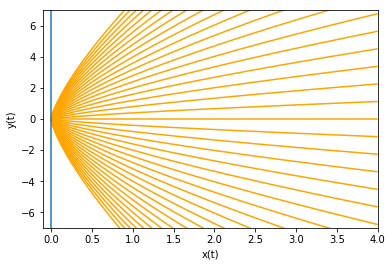

In [17]:
def foo(x): # first equation
    return x**(3/4)
phasePath(foo)

#### Выбранная фазовая кривая отмечена синим цветом (вертикальная прямая). Это верно, так как при заданом начальном решении, x постоянный и равен нулю.

/home/pavlik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


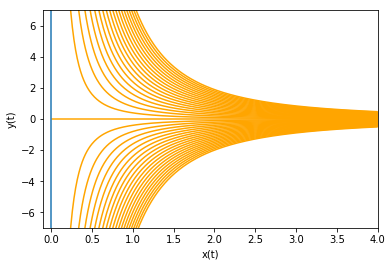

In [18]:
def foo(x): # second equation
    return x**(-2)
phasePath(foo)

#### Здесь абсолютно аналогичные рассуждения.

### Task 6

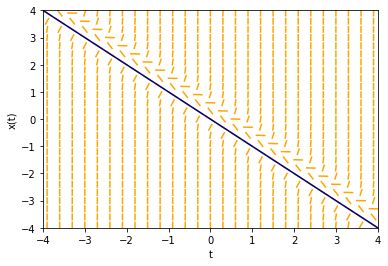

In [29]:
def foo(t, x): # Old equation
    return (-4 * t -4 * x + 1) ** 2 - 2
def fooAdd(t):
    return -t
slopeField(foo, None, fooAdd)

#### Where blue line is solution, which satisfies starting condition x(-1) = 1.

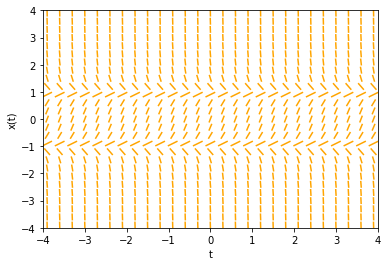

In [20]:
def foo(t, z): # New equation
    return 4 - 4 * z**2
slopeField(foo)

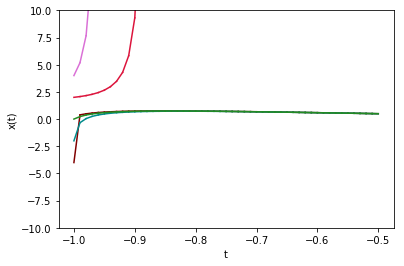

In [21]:
def foo(t, x): # Old equation
    return (-4 * t -4 * x + 1) ** 2 - 2
integralCurve(foo, -1, -0.5, [-4, -2, 0, 2, 4], 0.01)

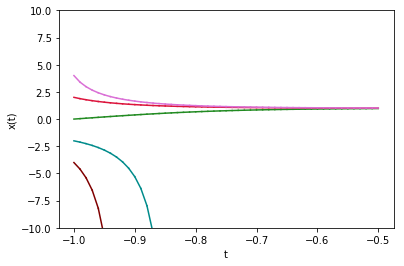

In [22]:
def foo(t, z): # New equation
    return 4 - 4 * z**2
integralCurve(foo, -1, -0.5, [-4, -2, 0, 2, 4], 0.01)

### Task 7